# Exercise 20 – Simulations and Populations

Notebook Written By: WDY (Yale-NUS '24) 
(Come say hi at https://www.linkedin.com/in/dys-profile/)

### Introduction

For today’s activities we consider the survey data you provided earlier in the semester. We have upscaled the population size to 100,000 though, since we want to repeatedly sample many times from the population.

Explore the data. We have only kept some information from it.

What is the mean height in this population?


In [4]:
x <- read.csv("C:/Users/User/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise U - Sampling Variability/pop2020.csv")

In [5]:
str(x)

'data.frame':	100000 obs. of  4 variables:
 $ height     : num  175 147 160 150 167 ...
 $ youtube    : int  1 984813 7822601 2 524 0 0 0 2 3136 ...
 $ nationality: Factor w/ 2 levels "NSG","SG": 2 2 2 2 2 2 2 2 2 2 ...
 $ gender     : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...


In [6]:
head(x)

height,youtube,nationality,gender
175.0107,1,SG,F
146.8246,984813,SG,F
159.9964,7822601,SG,F
150.0489,2,SG,F
167.4715,524,SG,F
163.3703,0,SG,F


In [7]:
# FIND MEAN HEIGHT

trueM <- mean(x$height)
trueM

[1] 168.2991

### Step 1: Explore the data with a histogram

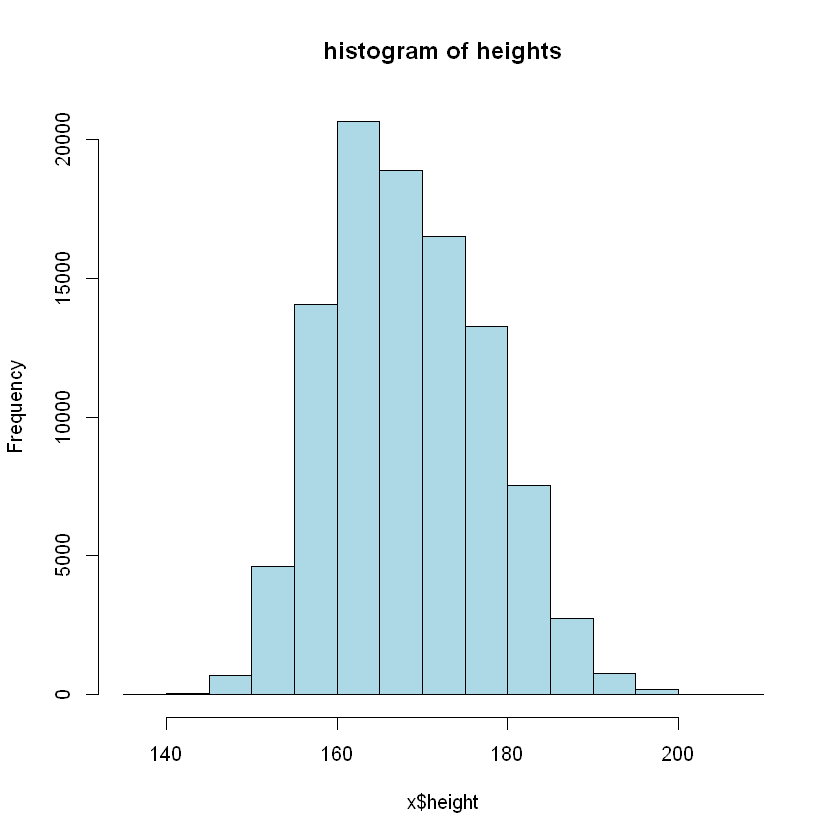

In [8]:
# FIND HISTOGRAM OF HEIGHTS

hist(x$height,
    col = "lightblue",
    main = "histogram of heights")

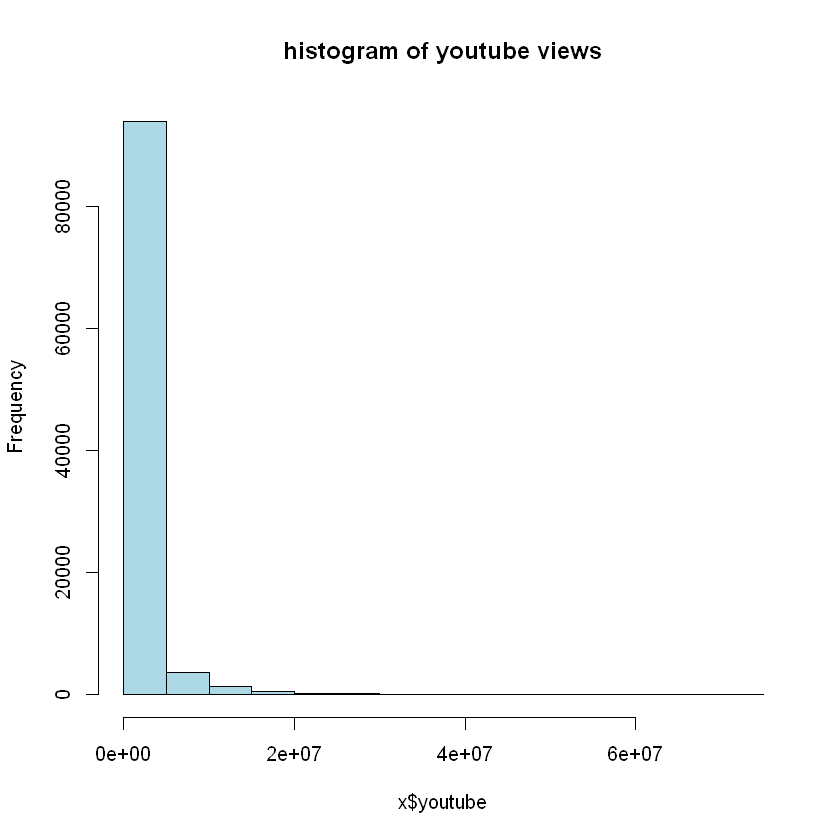

In [9]:
# FIND HISTOGRAM OF YOUTUBE VIEWS

hist(x$youtube,
    col = "lightblue",
    main = "histogram of youtube views")

We aim to study how sample statistics behave.

We will treat the data frame x as our population. In reality, it is unlikely you would have access to all the data from a population, so this should be considered a hypothetical exercise.

We will sample from the population to see how our statistics (from looking at a sample) behave relative to the true population parameters.

We will look for lessons in how to design sampling strategies so that our sample statistics are more likely to estimate well the corresponding population parameters.

### Step 2: Take a single sample of size 10 from the population and calculate its mean

In [10]:
my_first_sample_mean <- mean(sample(x$height, size = 10))

### Step 3: Reiterate the sample 500 times

In [11]:
# INITIALIZE H10 ARRAY
h10 <- numeric(500)

# USE A FOR LOOP 
for (i in 1:500) {
    h10[i] <- mean(sample(x$height, size = 10))
}

It would be better if we could change the sample size and the number of samples easily, so we use variables.

In [12]:
# INITIALIZE VARIABLES FOR EASY CHANGING

# INITIALIZE SAMPLE SIZE
n <- 10          

# INITIALIZE NUMBER OF SAMPLES
reps <- 500

h10 <- numeric(reps)

for (i in 1:reps) { 
    h10[i] <- mean(sample(x$height, size = n)) 
}

This makes the code more easily reusable, and helps avoid errors.

### Step 4: Conduct sampling to estimate the mean

- How does sample size affect the accuracy of the estimate of the mean for heights in the population?

- Start with a small sample size and look at the distribution of the sample means if you repeat taking many samples of this size. What does the distribution of sample means look like?

- Repeat the experiment with a larger sample size.

In [13]:
# SAMPLE SIZE
n <- 10

# NUMBER OF SAMPLES
reps <- 5000

# INITIALIZE H10 ARRAY WITH 5000 SAMPLES
h10 <- numeric(reps)

# CREATE FOR LOOP AND APPEND SAMPLE MEAN VALUES INTO H10
for (i in 1:reps) { 
    h10[i] <- mean(sample(x$height, size = n)) 
}

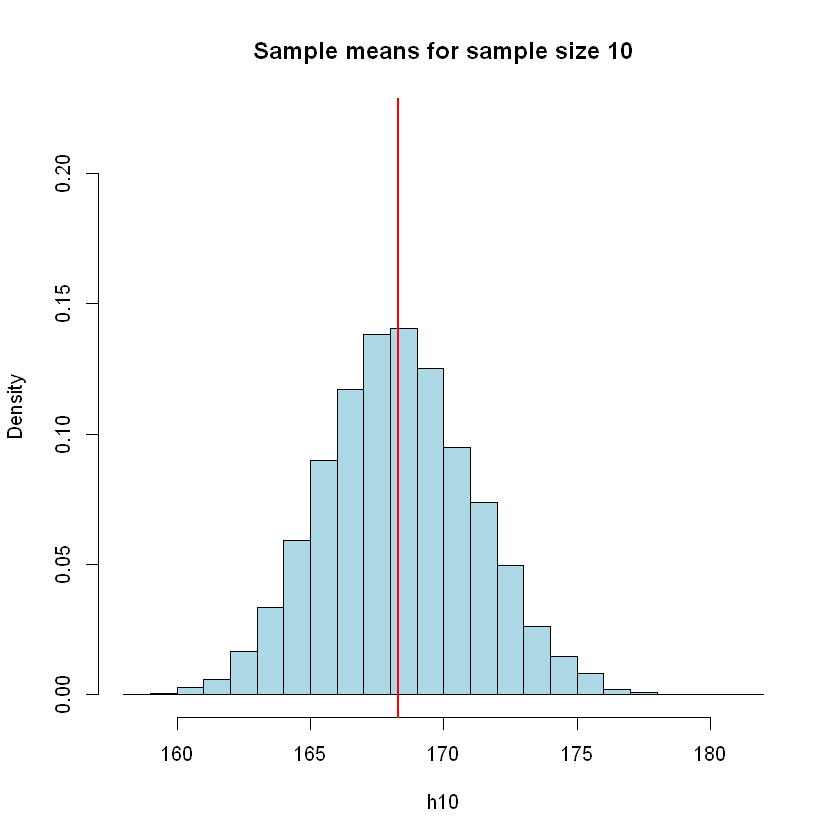

In [14]:
# DRAW A HISTOGRAM OF SAMPLE SIZE 10

hist(h10, col='lightblue', 
     main="Sample means for sample size 10", 
     freq=FALSE, 
     breaks=c(seq(158,182,1)), 
     ylim=c(0,0.22))

abline(v=trueM, col=2, lwd=2)

In [15]:
# SAMPLE SIZE OF 20
n <- 20

# NUMBER OF SAMPLES 5000
reps <- 5000

# INITIALIZE ARRAY H20 
h20 <- numeric(reps)

# CREATE FOR LOOP AND APPEND SAMPLE MEAN VALUES INTO H20
for (i in 1:reps) { 
    h20[i] <- mean(sample(x$height, size = n)) 
}

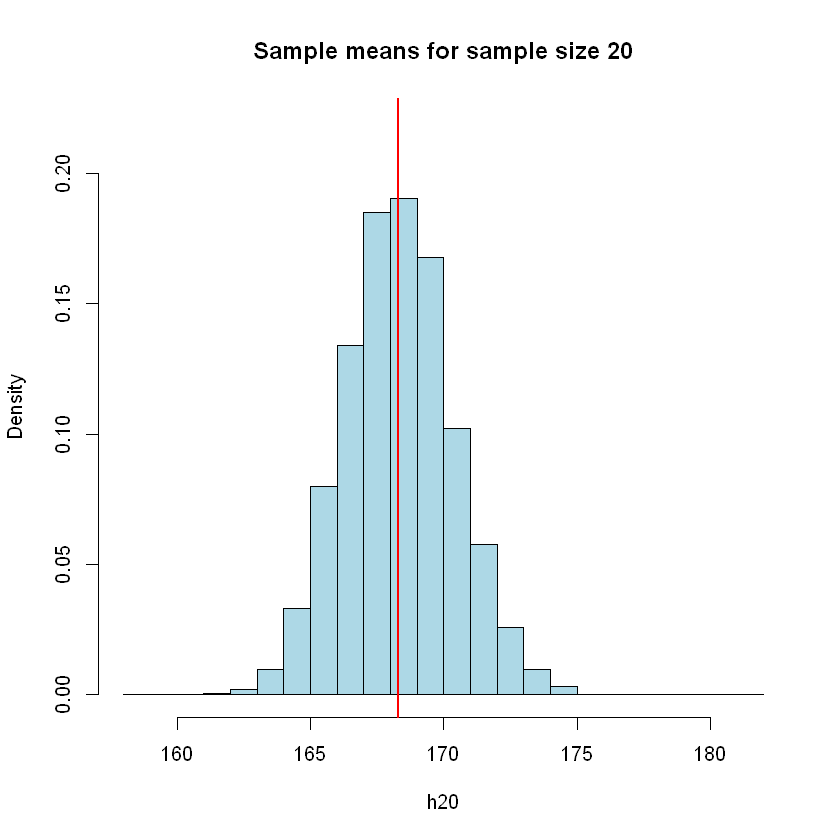

In [16]:
# DRAW HISTOGRAM
hist(h20, 
     col='lightblue', 
     main="Sample means for sample size 20", 
     freq=FALSE, 
     breaks=c(seq(158,182,1)), 
     ylim=c(0,0.22))

# DRAW BEST FIT LINE
abline(v=trueM, col=2, lwd=2)

### Analysis

- Already with a small sample size the distribution of the sample means looks quite Normal. This is because the distribution of heights in the population looks quite Normal, exhibiting just a bit of skewness.

- With a larger sample size, the distribution of the sample means is more concentrated around the true population mean.

### Conclusion

Imagine we are taking only one sample and we want to use the sample mean of that sample to estimate the population mean. Our experiment suggests that the estimate is more likely to be better if we user a sample of size 20 than if we use a sample of size 10.

But it is not guaranteed to be better; there were samples of size 10 whose sample mean was within 1cm the population mean and some (albeit fewer) samples of size 20 whose mean was approx 5cm away from the population mean.

Conclusion: the sample mean is more likely to be closer to the true mean when the sample size is bigger.

Although we will not investigate it today, a smaller population standard deviation also improves how well sample means estimate the population mean. If you are designing a sampling strategy, is this fact relevant?

### Step 5 - Find percentiles of samples of different size

Recall the quantile() function, which can calculate what values correspond to different percentiles.

- Which percentiles would we be interested in if we wanted to identify the range in which we can find 95% of the possible sample mean values?

- Find those percentiles for the samples of size 10 and the samples of size 20. Compare.

In [17]:
# FIND QUANTILES OF SAMPLES OF SIZE 20
quantile(h20, c(0.025, 0.975)) 

2.5%    97.5% 
164.5285 172.4601

In [18]:
# FIND QUANTILES OF SAMPLES OF SIZE 10
quantile(h10, c(0.025, 0.975)) 

2.5%    97.5% 
162.9393 174.0752

- By increasing the sample size, the 2.5% to 97.5% range of sample means decreases, concentrating sample means closer to the population mean.

- In practice, we would only be taking one sample so, even with a large sample size, we can’t guarantee the sample mean is close to the population mean. But …

- For a larger sample size, the “interval within which the sample mean is highly likely (95% chance) to fall” is closer to the true mean.

### Sample means for a skewed population

Recall that we found that for large enough sample size, the distribution of the sample mean is approximately Normal. But how large does the sample size have to be for this?

If the true population is Normal, then for any sample size the distribution of sample means is Normal. But when the true population is not normal, what is large enough will depend on the shape of the population distribution.

### Step 6: Test distribution of sample means for a skewed population

- What happens when the population distribution is far from normal? Try with different sample sizes on the YouTube data, which are very skewed.

- What happens now to the 2.5% to 97.5% interval that is likely to contain the true mean?

In [43]:
# SAMPLE SIZE 10
n <- 10

# NUMBER OF SAMPLES 5000
N <- 5000

# INITIALIZE ARRAY
y010 <- numeric(N)

# APPEND VALUES INTO ARRAY
for (i in 1:N) {
  y010[i] <- mean(sample(x$youtube, size = n))
}

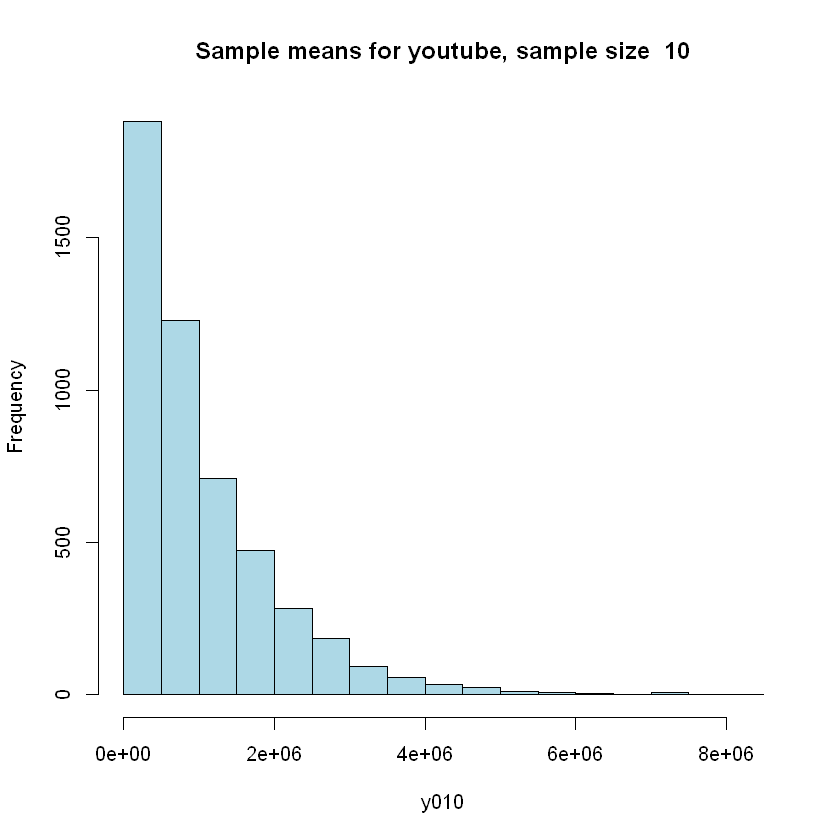

In [44]:
# DRAW OUT THE DISTRIBUTION OF HISTOGRAM

hist(y010, 
     col = "lightblue", 
     main = "Sample means for youtube, sample size  10")


In [45]:
# SAMPLE SIZE
n <- 30

# NUMBER OF TRIALS
N <- 5000

# INITIALIZE ARRAY
y030 <- numeric(N)

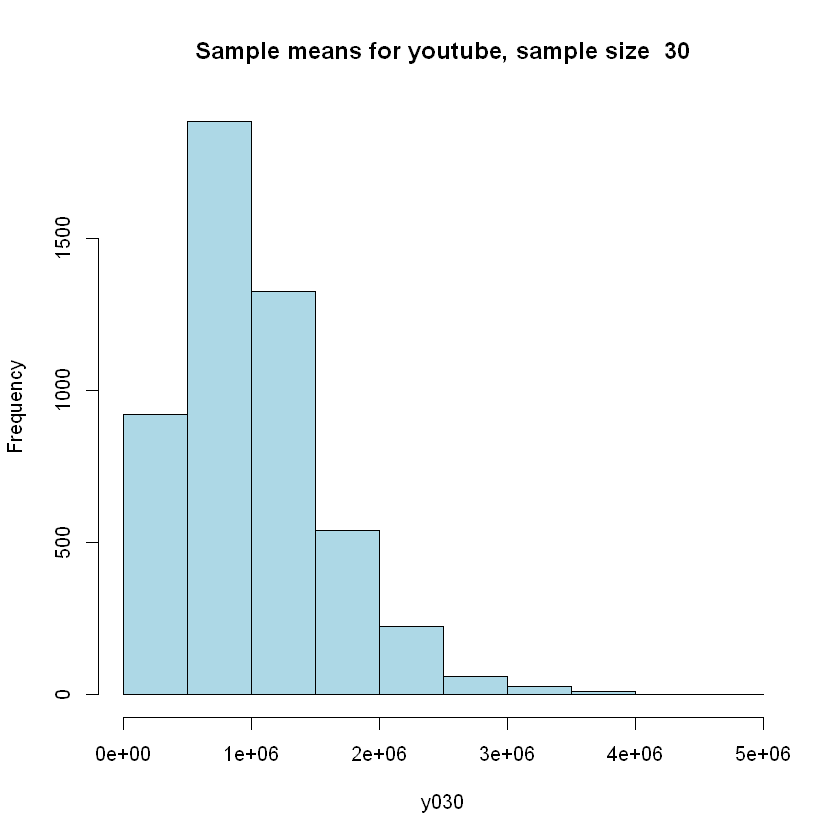

In [47]:
# APPEND SAMPLE MEANS INTO ARRAY
for (i in 1:N) {
  y030[i] <- mean(sample(x$youtube, size = n))
}

# DRAW OUT DISTRIBUTION
hist(y030, 
     col="lightblue", 
     main="Sample means for youtube, sample size  30")

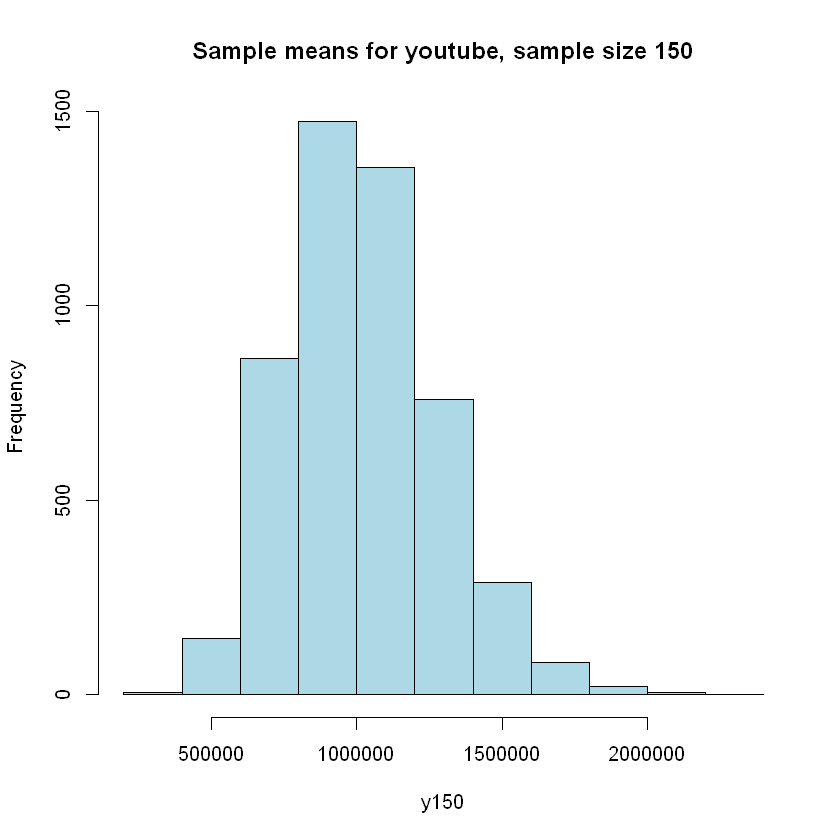

In [48]:
n <- 150

N <- 5000

y150 <- numeric(N)

for (i in 1:N) {
  y150[i] <- mean(sample(x$youtube, size = n))
}

hist(y150, 
     col="lightblue", 
     main="Sample means for youtube, sample size 150")

In [49]:
quantile(y010, c(0.025, 0.975)) 

quantile(y030, c(0.025, 0.975))

quantile(y150, c(0.025, 0.975)) 

2.5%      97.5% 
  29897.87 3669683.67

2.5%     97.5% 
 216766.5 2376320.8

2.5%     97.5% 
 584479.1 1578250.4

The 2.5% to 97.5% ranges are reducing.

- Even with this very skewed population distribution, the sample means better estimate the population mean when the sample size increases.


- Sample means are distributed more Normally for larger samples.


- But for a population distribution this skewed, perhaps it wasn’t a good idea to look at the mean to begin with! This was an fun experiment, but not much practical use.


- What happens when we consider sample statistics other than the mean?

### Step 7: Plot sample minima of height

Suppose that you are not interested in estimating the population mean but another population parameter, e.g. the population minimum.

Then we could use the sample minimum to estimate the population minimum.

Use x$height as the population for the above.

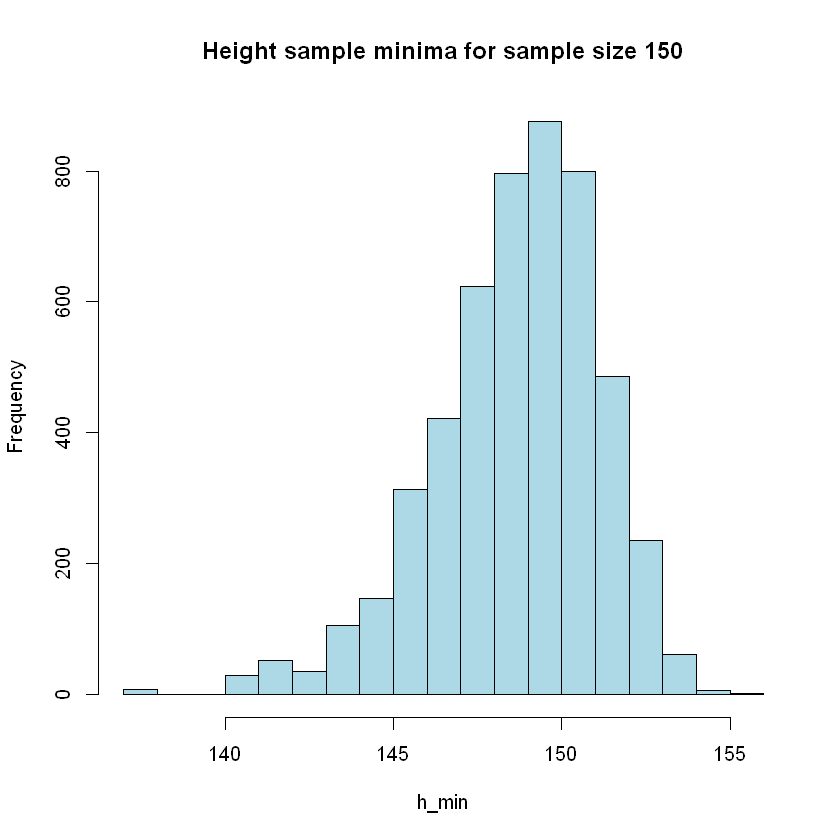

In [50]:
# SAMPLE SIZE
n <- 150

# TRIALS
reps <- 5000

# INITIALIZE ARRAY
h_min <- numeric(reps)

# APPEND ARRAY WITH VALUES FROM X$HEIGHT
for (i in 1:reps) {
  h_min[i] <- min(sample(x$height, size = n))
}

# PLOT DISTRIBUTION
hist(h_min, 
     col='lightblue', 
     main="Height sample minima for sample size 150")

### Step 8: Find the normality of the distribution

Does the distribution of the sample minima taken from samples of certain size look Normal if you repeat taking samples many times?

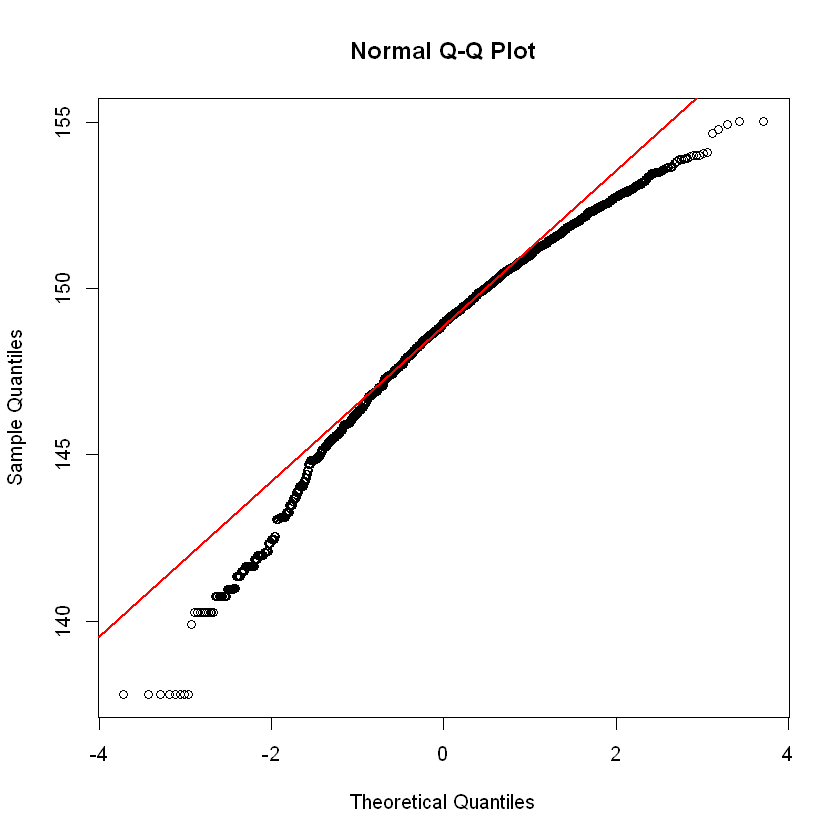

In [51]:
qqnorm(h_min)
qqline(h_min, col=2, lwd=2)

The distribution of sample minima looks less Normal than the original data!

### Step 9: Plot sample median of YouTube views

Try also for estimating the median of the YouTube views. 

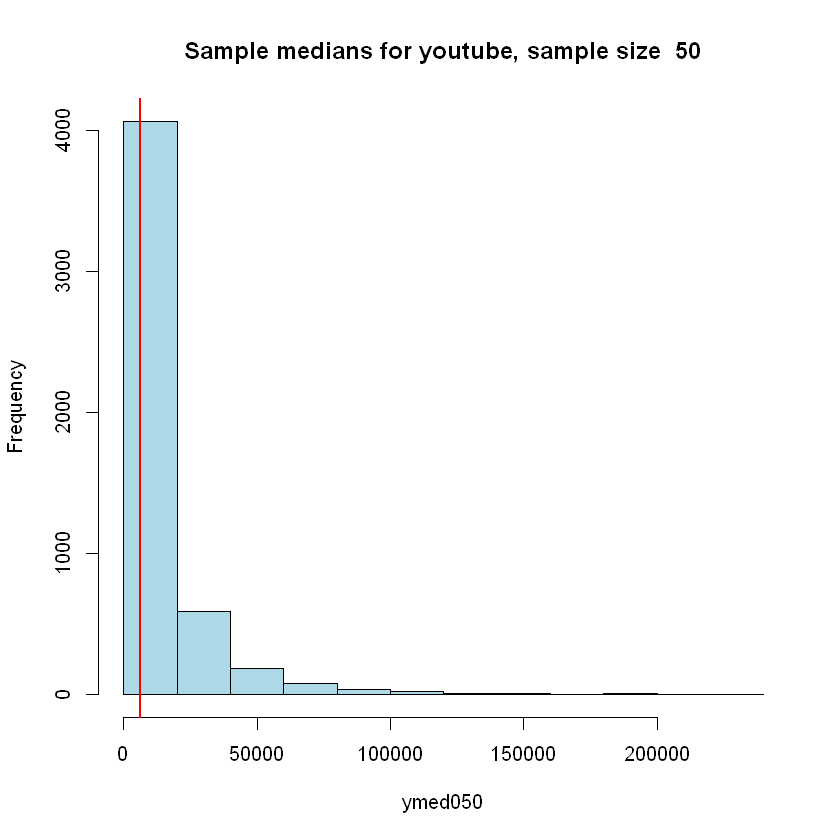

In [55]:
# SAMPLE SIZE OF 50
n <- 50

# NUMBER OF TRIALS
reps <- 5000

# INITIALIZE ARRAY
ymed050 <- numeric(reps)

# APPEND ARRAY WITH VALUES
for (i in 1:reps) { 
    ymed050[i] <- median(sample(x$youtube,size = n)) 
}

# PLOT DISTRIBUTION OF SAMPLE MEDIANS OF YOUTUBE VIEWS
hist(ymed050, 
     col="lightblue", 
     main="Sample medians for youtube, sample size  50")

# PLOT MEDIAN LINE
abline(v=median(x$youtube),col=2,lwd=2)

### Step 10: Plot for a larger sample size of YouTube Views
Does larger sample size improve the estimate?

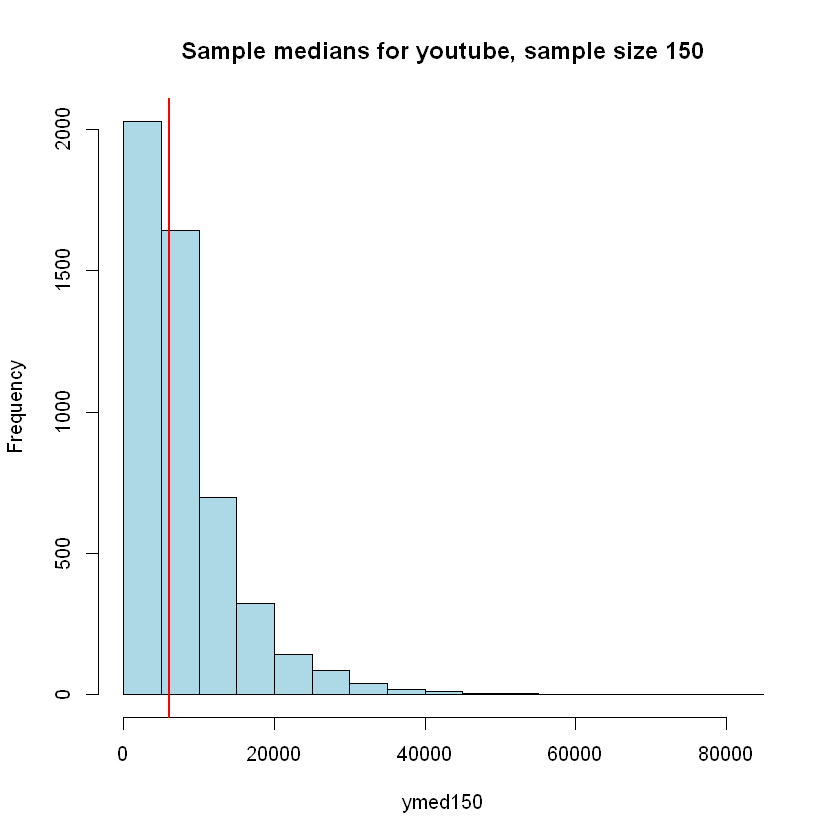

In [56]:
# SAMPLE SIZE OF 150
n <- 150

# NUMBER OF TRIALS
reps <- 5000

# INITIALIZE ARRAY
ymed150 <- numeric(reps)

# APPEND VALUES INTO ARRAY
for (i in 1:reps) { 
    ymed150[i] <- median(sample(x$youtube, size = n)) 
}

# PLOT DISTRIBUTION OF SAMPLE SIZES
hist(ymed150, 
     col="lightblue", 
     main="Sample medians for youtube, sample size 150")

abline(v=median(x$youtube),col=2,lwd=2) 

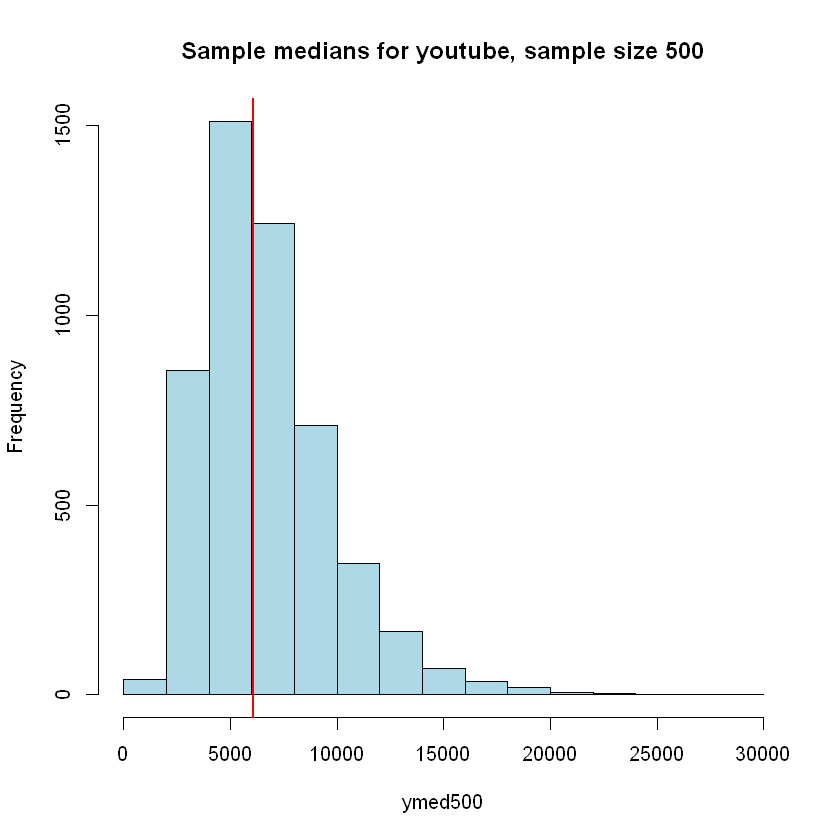

In [58]:
# SAMPLE SIZE
n <- 500

# NUMBER OF TRIALS
reps <- 5000

# INITIALIZE ARRAY
ymed500 <- numeric(reps)

# APPEND VALUES INTO ARRAY
for (i in 1:reps) { 
    ymed500[i] <- median(sample(x$youtube, size = n)) 
}

# PLOT NUMBER DISTRIBUTION
hist(ymed500, 
     col="lightblue", 
     main="Sample medians for youtube, sample size 500")

abline(v=median(x$youtube), col = 2, lwd = 2)

### Step 11: Find quantiles of the sample sizes

In [60]:
quantile(ymed050, c(0.025, 0.975))

quantile(ymed150, c(0.025, 0.975))

quantile(ymed500, c(0.025, 0.975))

2.5%      97.5% 
  290.9375 68501.6125

2.5%     97.5% 
 1098.413 26902.237

2.5%     97.5% 
 2407.925 14202.187

The 2.5% to 97.5% ranges are reducing.

The interval in which 95% of sample medians fall is narrower for larger samples than it is for smaller samples.

### Analysis

- The distribution of sample medians and looks more symmetric with increasing sample size, but it is still skewed, and we had to increase the sample size greatly!

- The distribution of sample minima looks less symmetric than the population.

- The Normal distribution approximation applies to the distribution of the sample mean but not to other sample statistics.

### Step 12: Subset populations using categorical variables

There is a difference in the height for different subgroups.

- Try subsetting the population using the categorical variables.

- Try also combinations of the categorical variables.

Where do you see the biggest difference?

In [61]:
# MALE GENDER
mean(x$height[x$gender == 'M']) 

# FEMALE GENDER
mean(x$height[x$gender == 'M'])

# SINGAPOREAN NATIONALITY
mean(x$height[x$nationality == 'SG'])

# NON SINGAPOREAN NATIONALITY
mean(x$height[x$nationality == 'NSG'])

[1] 175.3244

[1] 175.3244

[1] 167.8905

[1] 168.8204

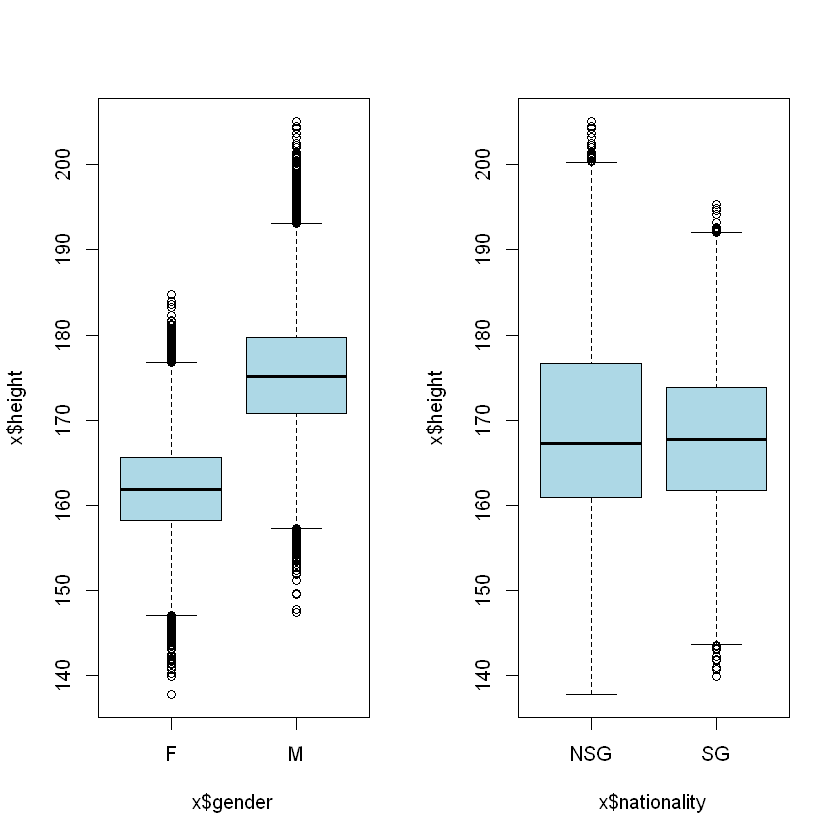

In [63]:
# PLOT 2 SIDE BY SIDE
par(mfrow=c(1,2))

# PLOT BOXPLOTS
boxplot(x$height~x$gender, col="lightblue")
boxplot(x$height~x$nationality, col="lightblue")

# REVERT TO ORIGINAL
par(mfrow=c(1,1))

In [64]:
# SINGAPOREAN NATIONALITY

mean(x$height[x$nationality == 'SG' & x$gender =='M'])

mean(x$height[x$nationality == 'SG' & x$gender =='F'])

# NON SINGAPOREAN NATIONALITY

mean(x$height[x$nationality == 'NSG' & x$gender =='M'])

mean(x$height[x$nationality == 'NSG' & x$gender =='F'])

[1] 173.6947

[1] 162.19

[1] 177.6228

[1] 161.6684

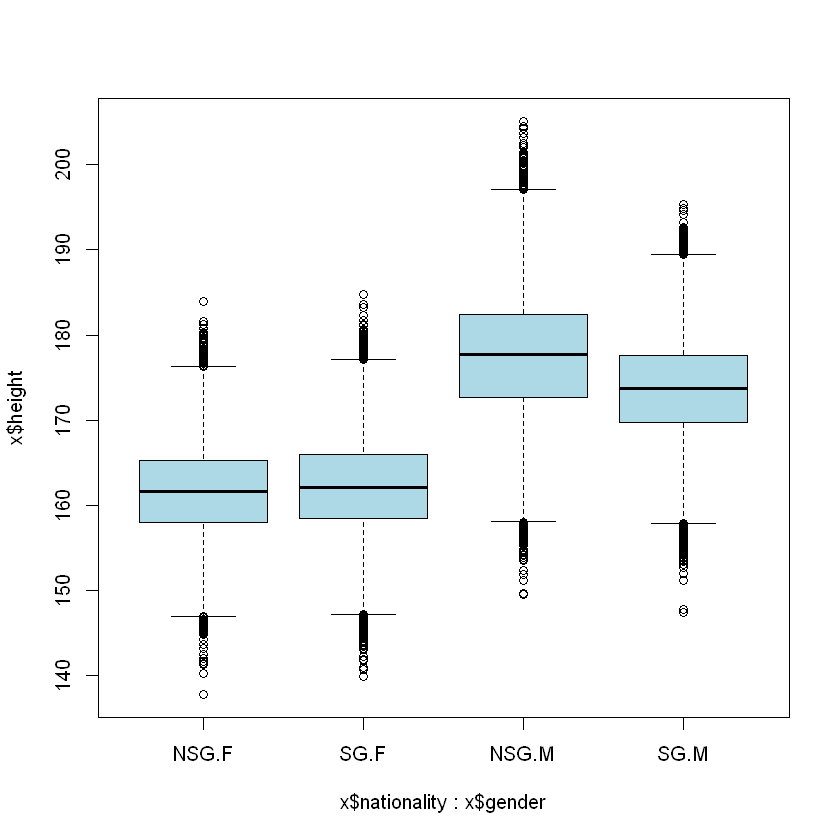

In [65]:
boxplot(x$height ~ x$nationality + x$gender, col="lightblue")

There appear to be 3 subgroups in the population:

- Women
- Non Singaporean men
- Singaporean men

If we had only studied gender and nationality separately then we would have missed a subgroup!

Suppose we know in advance (eg from a study in a previous year) that the population is divided into groups with different distributions. And suppose we know the proportion in each group in the population:

In [66]:
table(x$gender, x$nationality)/nrow(x)

   
        NSG      SG
  F 0.24242 0.28283
  M 0.19697 0.27778

So in every 25 people there are approximately 13 women, 5 non Singaporean men, and 7 Singaporean men.

Randomly overselecting from one group could push us away from the mean.

When we stratify our samples, we ensure that the proportion in each subgroup of the sample matches the proportion in the corresponding subgroup in the population.

Going back to estimating the mean height, stratify your sample such that each sample of size 25 contains 13 women, 5 non Singaporean men, and 7 Singaporean men.

How does the distribution of the sample means from the stratified samples compare to that from simple random samples of size 25?

### Step 13: Plot distribution of stratified samples VS simple random samples

In [70]:
# NUMBER OF TRIALS
N <- 5000

# INITIALIZE ARRAY OF 5000
samples_groupsStrat <- numeric(N)

# APPEND VALUES INTO ARRAY (SAMPLE 13 FEMALES, 5 NSG MEN, 7 SG MEN)
for (i in 1:N) {
  samples_groupsStrat[i] <- mean(c(sample(x$height[x$gender == 'F'], size=13), 
                                   sample(x$height[x$gender == 'M' & x$nationality == "NSG"], size=5),
                                   sample(x$height[x$gender == 'M' & x$nationality == "SG"], size=7)))
}

# INITIALIZE NORMAL ARRAY OF 5000
samples_SRS25 <- numeric(N)

# APPEND VALUES IF NO STRATIFY INTO SAMPLE
for (i in 1:N) {
  samples_SRS25[i] <- mean(sample(x$height, size=25))
}

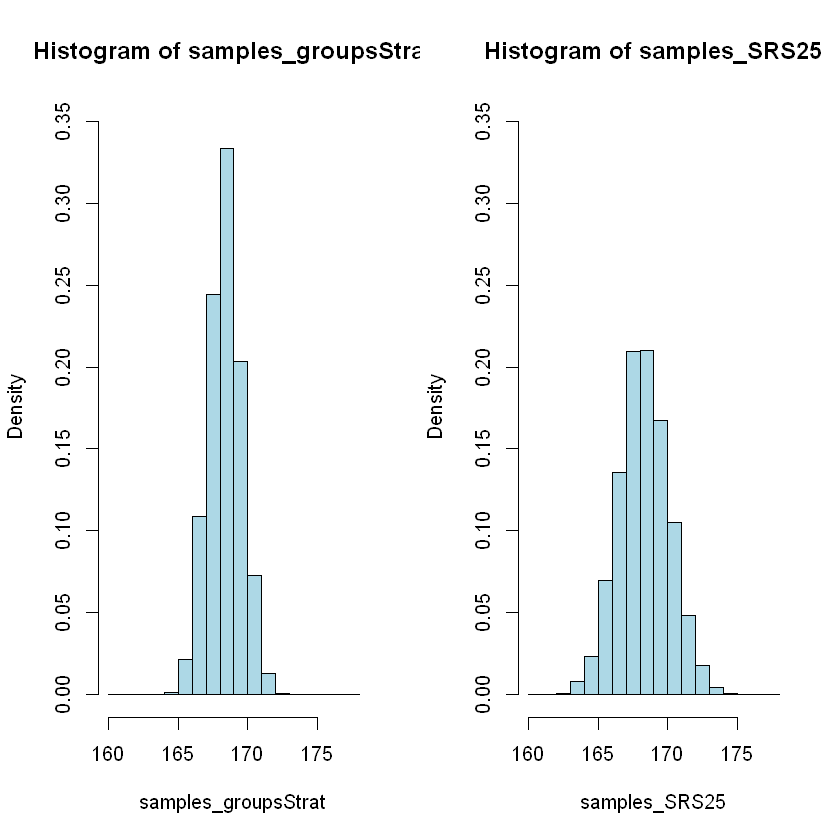

In [71]:
par(mfrow=c(1,2))

# PLOT STRATIFIED SAMPLES
hist(samples_groupsStrat, 
     freq=FALSE, 
     col="lightblue", 
     breaks=c(seq(160,178,1)), 
     ylim=c(0,0.35))

# PLOT SIMPLE SAMPLES
hist(samples_SRS25, 
     freq=FALSE, 
     col="lightblue", 
     breaks=c(seq(160,178,1)), 
     ylim=c(0,0.35))

par(mfrow=c(1,1))

### Step 14: Check standard deviations of samples

In [73]:
sd(samples_groupsStrat)

sd(samples_SRS25)

[1] 1.199397

[1] 1.808339

The distribution of means of stratified samples has smaller spread than the distribution of means of simple random samples.

Making sure that each sample has the same characteristics as the population sometimes matters. But simple random sampling is still pretty good, and the right default. Taking a larger simple random sample can make up for not stratifying.

### Step 15: Compare stratified samples by nationality against random samples

In [74]:
mean(x$height[x$nationality == 'SG']) 

mean(x$height[x$nationality == 'NSG']) 

[1] 167.8905

[1] 168.8204

In [76]:
# NUMBER OF TRIALS
N<-5000

# INITIALIZE ARRAY
samples_nationalityStrat <- numeric(N)


for (i in 1:N) {
  samples_nationalityStrat[i] <- mean(c(sample(x$height[x$nationality == 'SG'], 10), 
                                        sample(x$height[x$nationality == 'NSG'], 10)))
}

We can use the original h20 vector of sample means for the (unstratified) simple random sample.

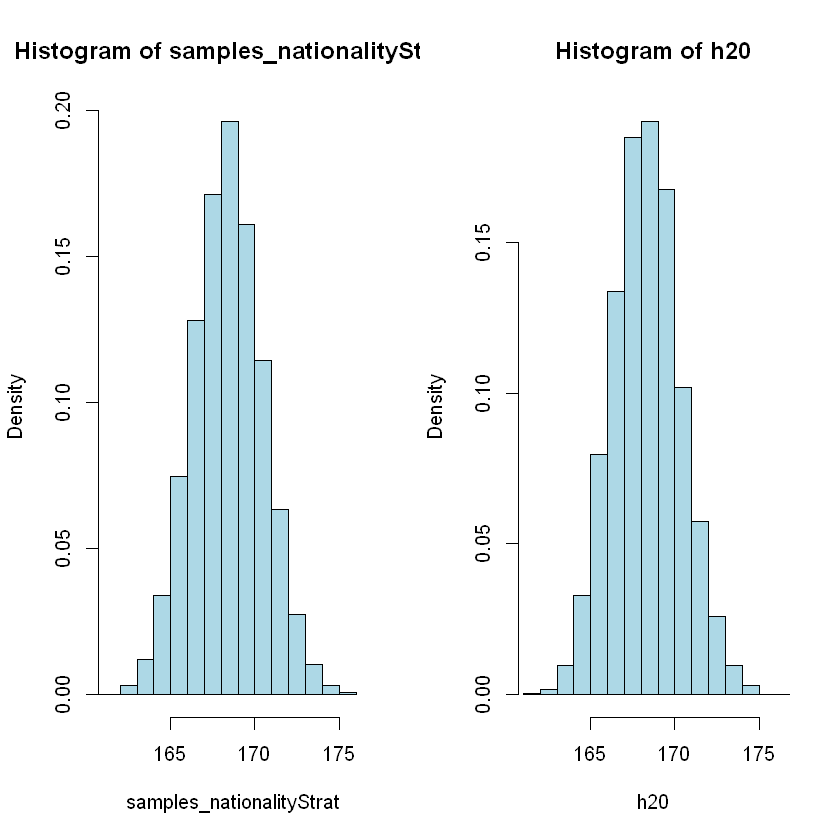

In [77]:
par(mfrow=c(1,2))

hist(samples_nationalityStrat, 
     freq= FALSE, 
     xlim=range(h20), 
     col="lightblue")

hist(h20, 
     freq= FALSE, 
     xlim=range(h20), 
     col="lightblue")

In [78]:
sd(samples_nationalityStrat)
sd(h20)

[1] 2.066741

[1] 2.020647

Stratfication now does just about nothing.

You should have a good reason for stratifying, or else you might introduce biases into your sample.

When stratifying, you also need to have a good idea of the true proportion of each subgroup in the population (otherwise you might end up over/under-representing a group in your sample).

Other cases where more control over sampling would be important: When you care about separate estimates for subgroups which vary in size. Think back to our Malaysian election results for the “other” category.

### Conclusion

When we randomly take a sample from a large population to estimate a population parameter via the sample statistic, each sample will give us a different answer (sampling variablily).

The larger the sample size, the higher the chance that the estimate from our sample is close to the true population parameter.

We got an intuition concerning the interplay between sampling size, sampling variability, and shape of the population distribution:

- Sample means are distributed quite symmetrically, even for very skewed populations, and the larger the sample, the more symmetric.
- This does not necessarily work for other sample statistics.